
--- Analyserar siffra1.jpg ---
Modellen gissar på siffra: 1
Sannolikhet för gissningen: 28.8%


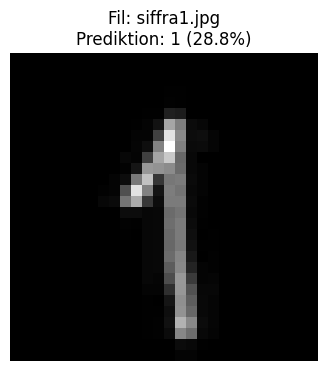

Alla sannolikheter:
  Siffra 0: 0.8%
  Siffra 1: 28.8%
  Siffra 2: 1.6%
  Siffra 3: 11.6%
  Siffra 4: 8.8%
  Siffra 5: 12.0%
  Siffra 6: 2.8%
  Siffra 7: 9.2%
  Siffra 8: 4.8%
  Siffra 9: 19.6%

--- Analyserar siffra2.jpg ---
Modellen gissar på siffra: 2
Sannolikhet för gissningen: 53.6%


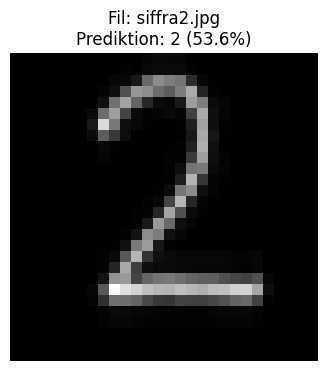

Alla sannolikheter:
  Siffra 0: 1.6%
  Siffra 1: 14.8%
  Siffra 2: 53.6%
  Siffra 3: 8.4%
  Siffra 4: 1.2%
  Siffra 5: 5.2%
  Siffra 6: 8.4%
  Siffra 7: 2.4%
  Siffra 8: 3.6%
  Siffra 9: 0.8%

--- Analyserar siffra6.jpg ---
Modellen gissar på siffra: 6
Sannolikhet för gissningen: 47.2%


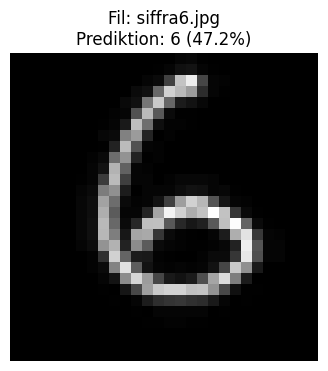

Alla sannolikheter:
  Siffra 0: 2.4%
  Siffra 1: 0.8%
  Siffra 2: 6.8%
  Siffra 3: 7.2%
  Siffra 4: 14.0%
  Siffra 5: 12.0%
  Siffra 6: 47.2%
  Siffra 7: 2.8%
  Siffra 8: 4.4%
  Siffra 9: 2.4%

--- Analyserar svart.jpg ---
Modellen gissar på siffra: 8
Sannolikhet för gissningen: 44.4%


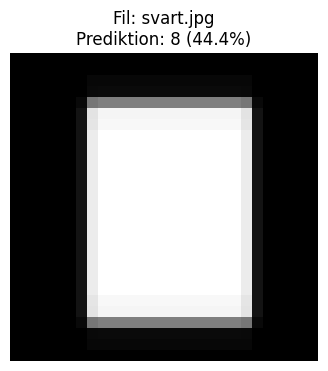

Alla sannolikheter:
  Siffra 0: 35.2%
  Siffra 2: 4.8%
  Siffra 3: 7.6%
  Siffra 4: 1.2%
  Siffra 5: 2.4%
  Siffra 6: 2.8%
  Siffra 8: 44.4%
  Siffra 9: 1.6%

--- Analyserar vit.jpg ---
Modellen gissar på siffra: 7
Sannolikhet för gissningen: 45.2%


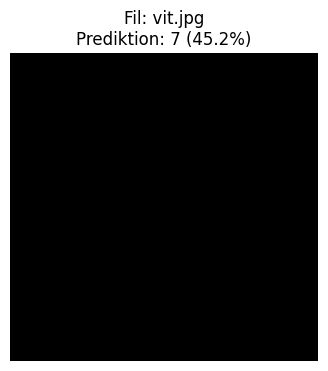

Alla sannolikheter:
  Siffra 1: 19.2%
  Siffra 2: 2.4%
  Siffra 3: 6.8%
  Siffra 4: 4.0%
  Siffra 5: 14.4%
  Siffra 6: 4.8%
  Siffra 7: 45.2%
  Siffra 8: 0.4%
  Siffra 9: 2.8%
Laddar MNIST-referenser för jämförelse...
Resultat för siffra1.jpg: Modellen gissar 1 med  28.8% säkerhet.


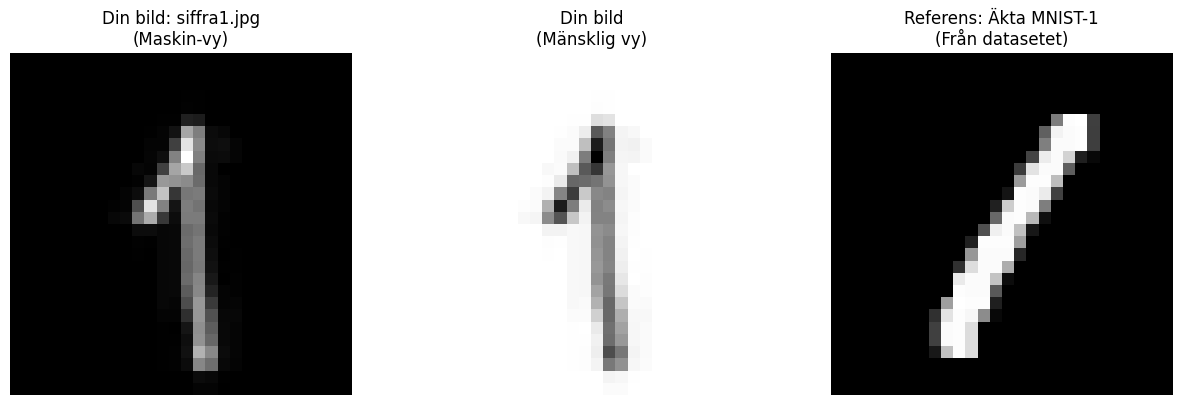

Resultat för siffra2.jpg: Modellen gissar 2 med  53.6% säkerhet.


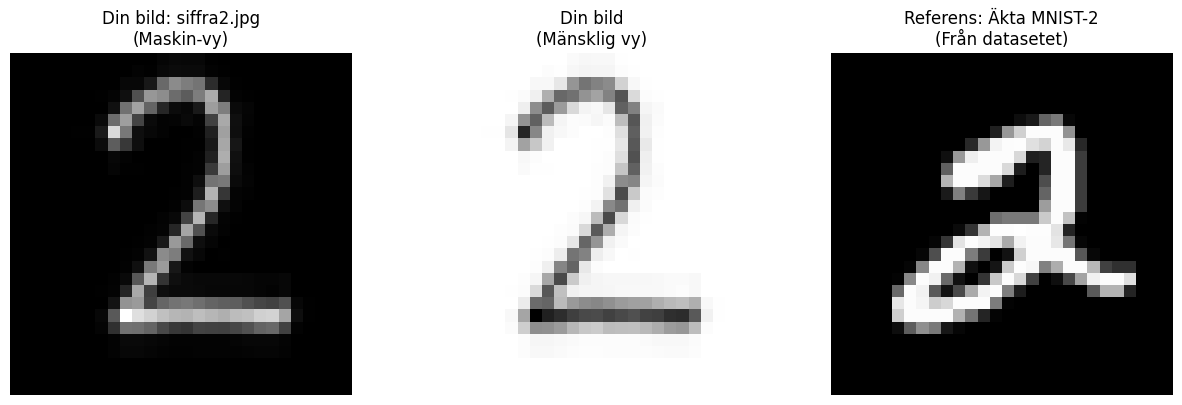

Resultat för siffra6.jpg: Modellen gissar 6 med  47.2% säkerhet.


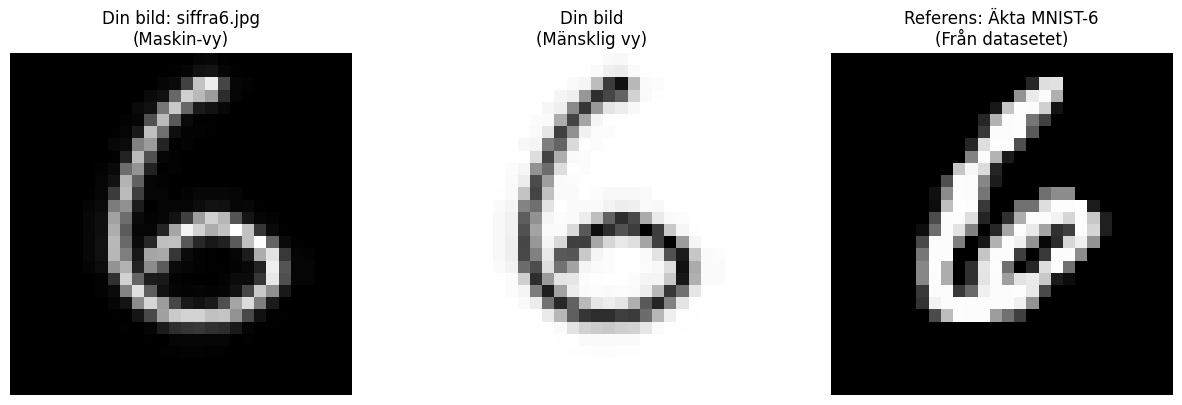

'\n\nimport importlib\nimport preprocess\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom joblib import load\nfrom sklearn.pipeline import Pipeline\nfrom PIL import Image\n\n# 1. Uppdatera moduler\nimportlib.reload(preprocess)\nfrom preprocess import preprocess_image\n\n# 2. Ladda scaler och modell\nmodel = load("mnist_extratrees_final.joblib")\nscaler = load("mnist_scaler.joblib")\npipe = Pipeline([(\'scaler\', scaler), (\'model\', model)])\n\n# 3. Lista på dina bilder\nimage_files = ["siffra1.jpg", "siffra2.jpg", "siffra6.jpg"]\n\nfor img_path in image_files:\n    # Kör preprocessing för modellen\n    X_raw, img_28 = preprocess_image(img_path)\n\n    # Ladda originalet för visning (nedskalad för att inte ta all kraft)\n    original_img = Image.open(img_path)\n    original_img.thumbnail((300, 300)) # Skalar ner för smidigare visning\n\n    # Gör prediktion\n    pred = pipe.predict(X_raw)[0]\n    proba = pipe.predict_proba(X_raw)[0]\n\n    # 4. Visualisering - FYRA vyer\n    

In [ ]:
import importlib
import preprocess
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from PIL import Image
from sklearn.datasets import fetch_openml

# Tvingad omladdning av senaste preprocessor-versionen (hade lite cache-problem)
importlib.reload(preprocess)
from preprocess import preprocess_image

model = load("mnist_model_final_svc.joblib")

# Lista på testbilder
image_files = ["siffra1.jpg", "siffra2.jpg", "siffra6.jpg", "svart.jpg", "vit.jpg"]

for img_path in image_files:
    try:
        
        X, img_28 = preprocess_image(img_path)
        
        # Jag vill ha procentuella sannolikheter och fick gå en liten omväg
        scores = model.decision_function(X)[0]
        exp_scores = np.exp(scores - np.max(scores))
        probabilities = exp_scores / exp_scores.sum()
        
        pred = np.argmax(probabilities)
        conf = probabilities[pred]

        # Det här tyckte jag blev ganska snyggt upplagt. Tydligt och bra. 
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        
        # Kolumn 1: Originalet
        original = Image.open(img_path)
        ax[0].imshow(original)
        ax[0].set_title(f"Original-JPG\n({img_path})")
        
        # Kolumn 2: Beskuren & Centrerad (Mänsklig vy)
        ax[1].imshow(img_28, cmap="binary")
        ax[1].set_title("Beskuren & Centrerad\n(Svart på vitt)")
        
        # Kolumn 3: Maskinens indata (Vitt på svart)
        ax[2].imshow(img_28, cmap="gray")
        ax[2].set_title(f"Maskinens indata\n(Pred: {pred})")
        
        # Kolumn 4: Sannolikhetsfördelning
        bars = ax[3].bar(range(10), probabilities, color='skyblue')
        bars[pred].set_color('yellow') # Markera vinnaren
        ax[3].set_title(f"Sannolikhet\n(Gissning: {conf:.0%})")
        ax[3].set_xticks(range(10))
        ax[3].set_ylim(0, 1.0) 

        for i in range(3): ax[i].axis("off")
        plt.tight_layout()
        plt.show()

        print(f">>> Analys klar för {img_path}: Prediktion {pred} ({conf:.1%})")

    except Exception as e:
        print(f"Den här bilden gick inte att bearbeta {img_path}: {e}")